 We will use Naive Bayes to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

import seaborn as sns

In [2]:
pdata = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(768, 9)

In [4]:
pdata.head() # To check first 5 rows of data set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pdata.isnull().values.any()

False

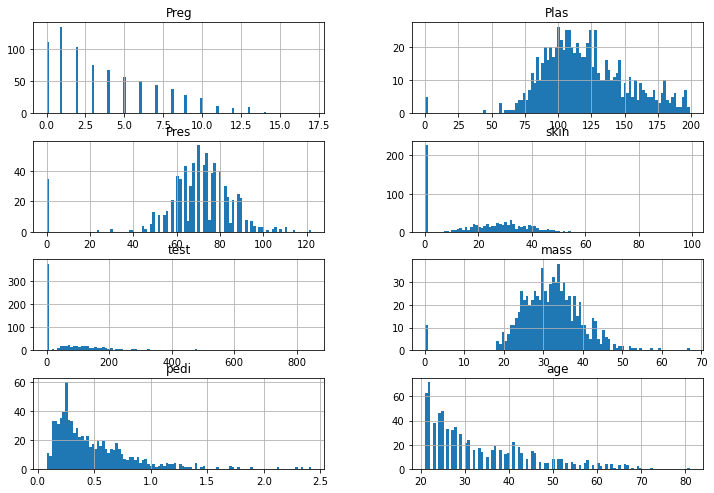

In [6]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [7]:
pdata.corr() # It will show correlation matrix

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
from sklearn.model_selection import train_test_split

X = pdata.drop('class',axis=1)     # Predictor feature columns (8 X m)

Y = pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [9]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0
